In [1]:
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '6'

In [3]:
df = pd.read_csv("/home/ianli/homl-self/credit_fraud/data/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

<div class="alert alert-block alert-info">
exploring data

In [4]:
import seaborn as sns

# Class distribution
print(df['Class'].value_counts(normalize=True))


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


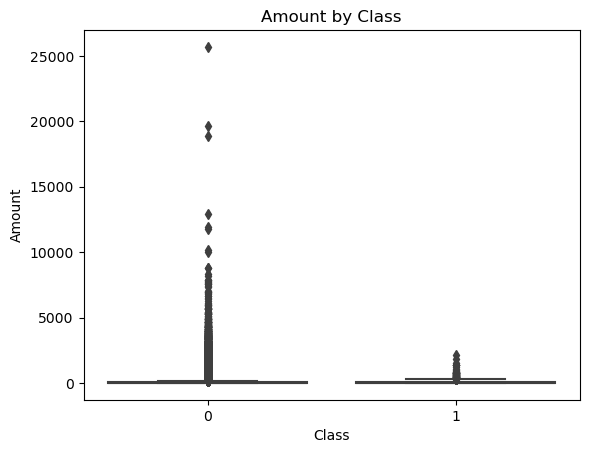

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


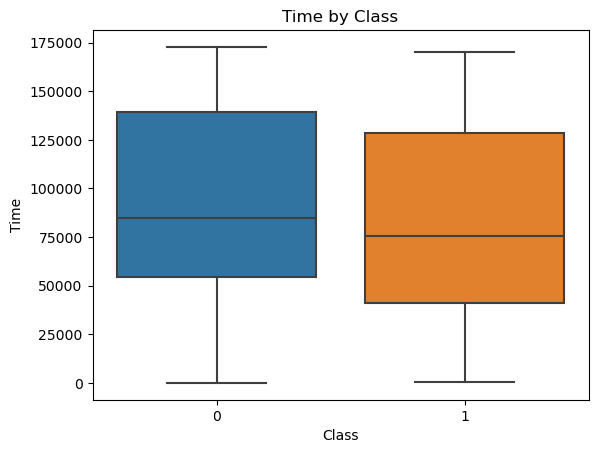

In [23]:
# Boxplots for 'Amount' and 'Time' by Class
for col in ['Amount', 'Time']:
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.show()

time does not look that interesting based on this box plot

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

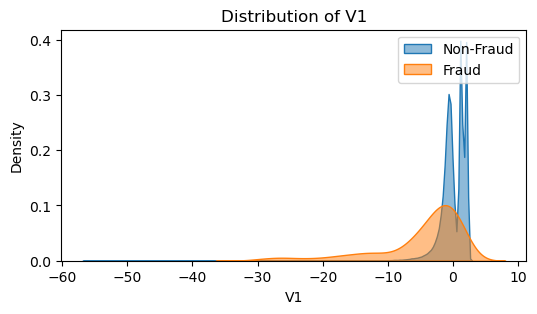

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

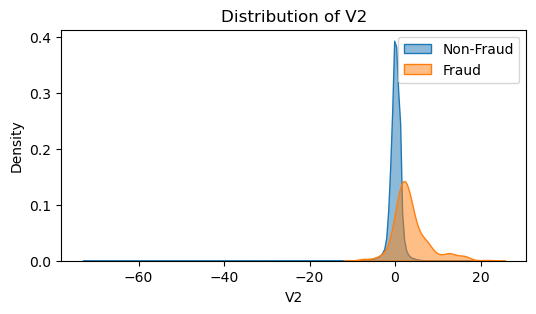

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

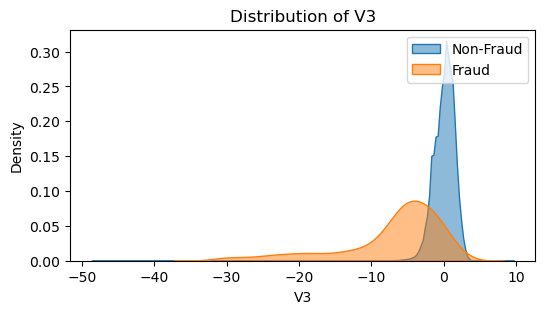

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

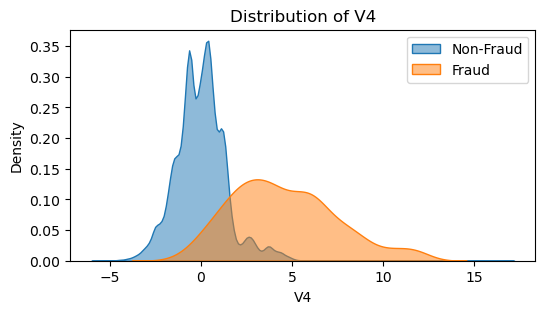

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

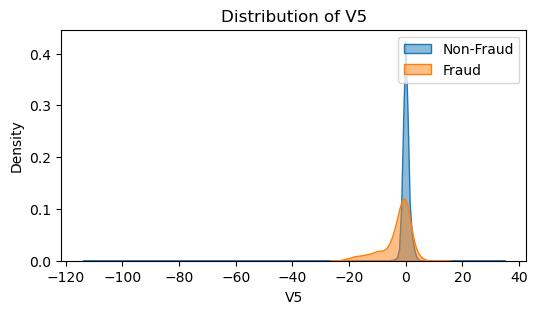

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

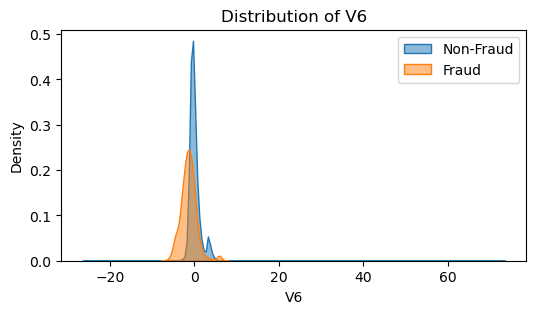

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

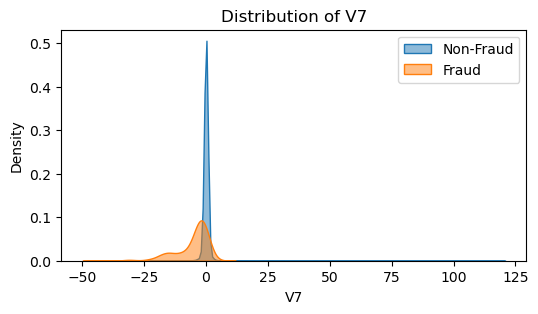

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

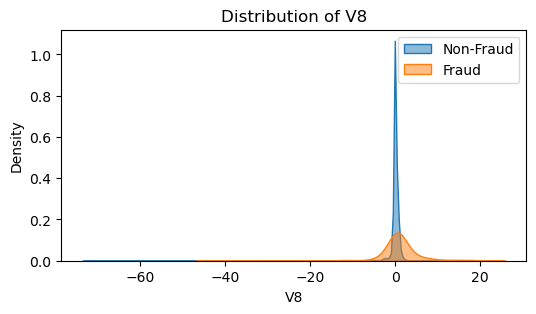

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

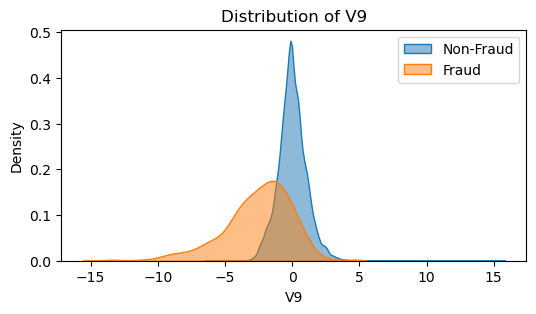

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

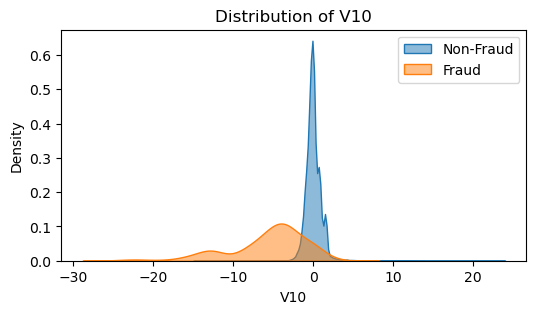

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

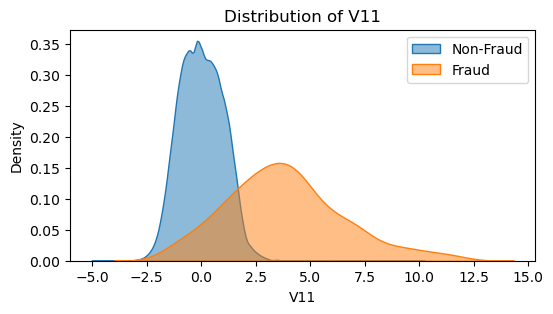

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

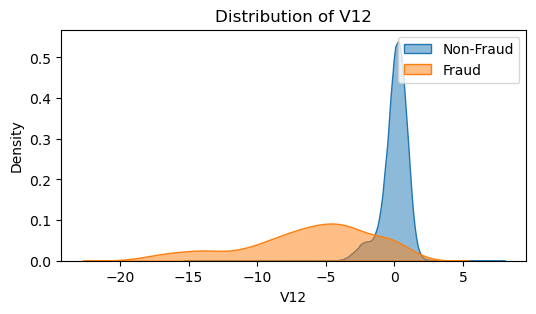

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

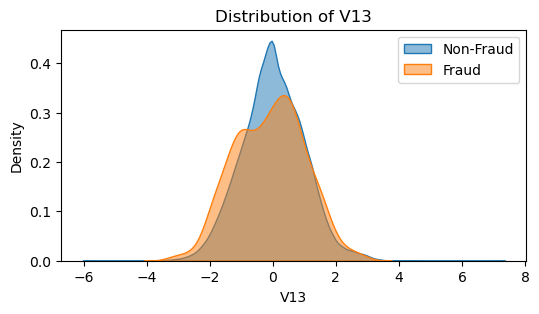

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

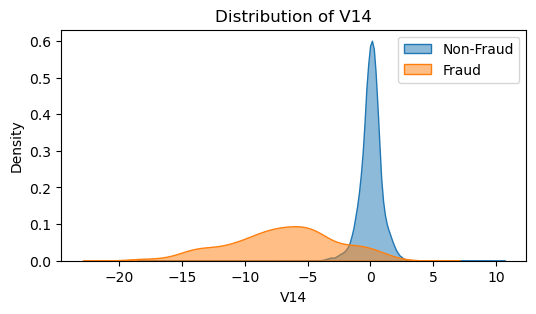

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

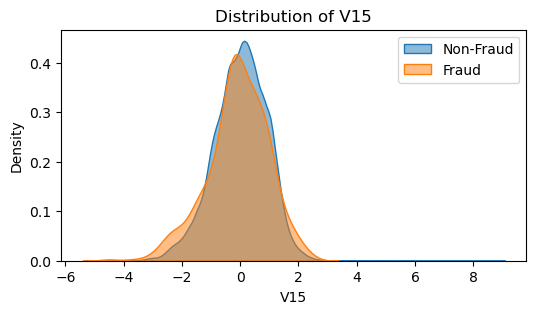

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

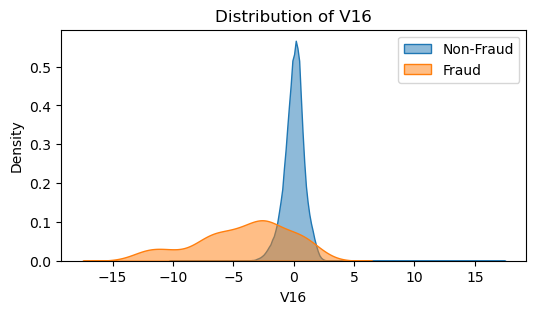

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

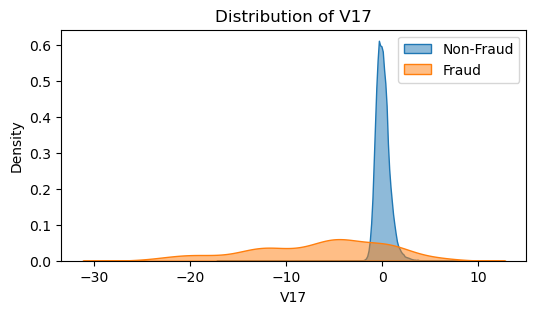

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

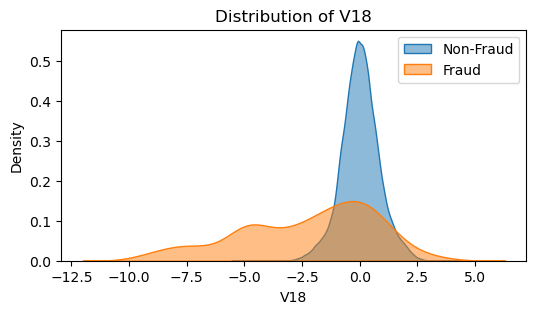

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

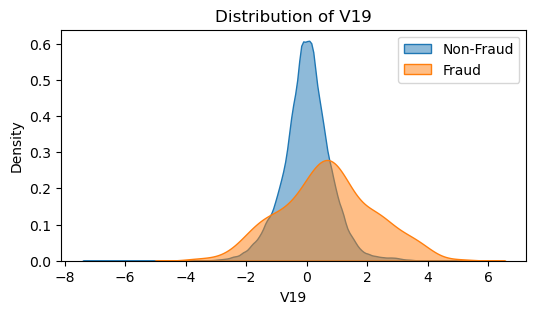

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

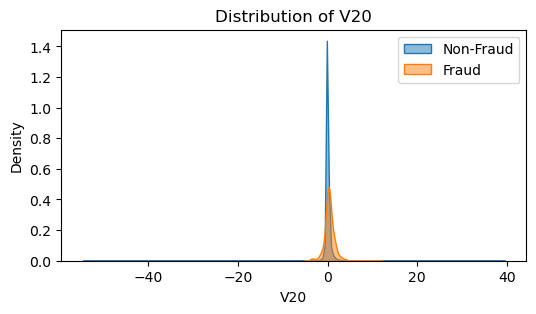

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

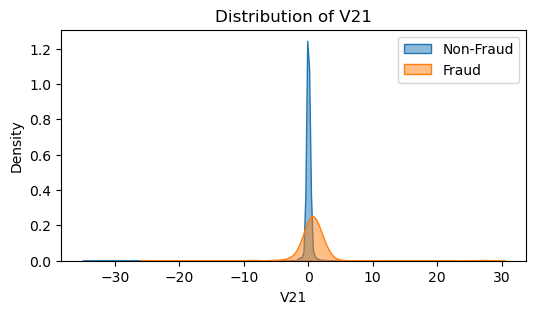

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

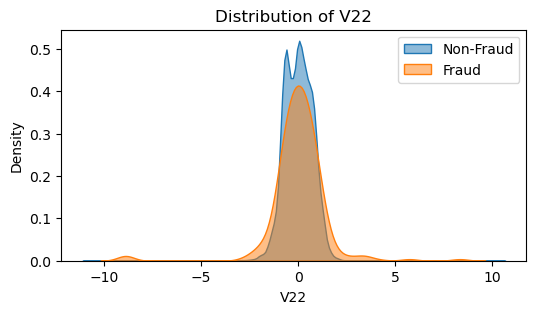

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

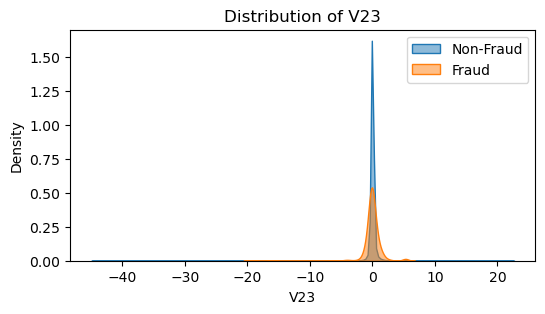

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

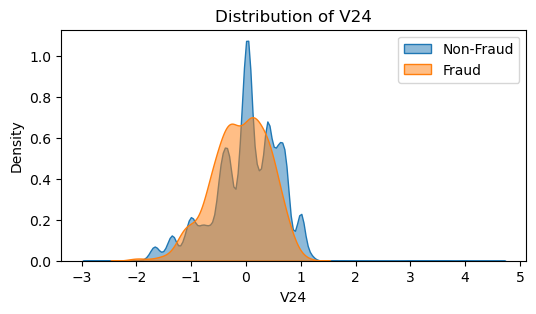

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

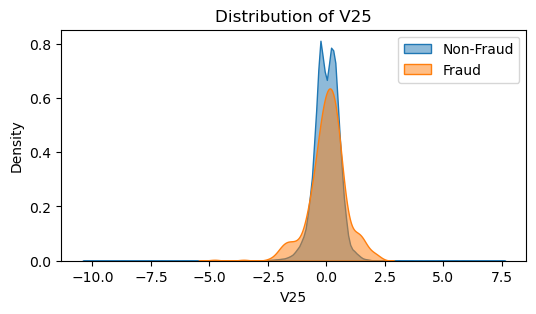

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

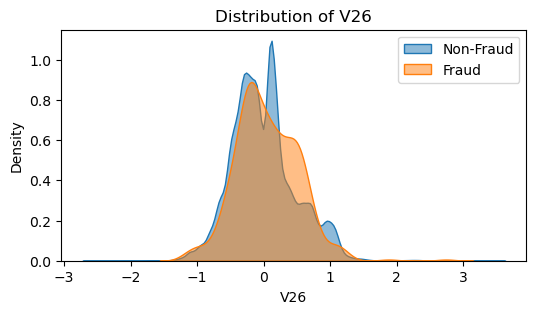

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

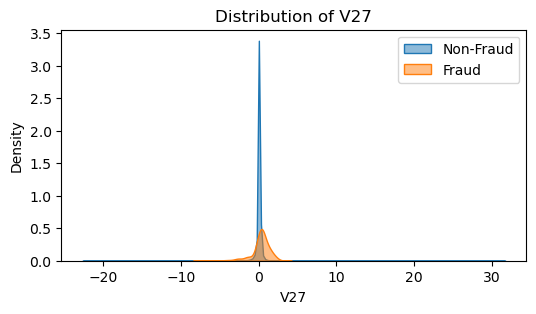

/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ianli/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

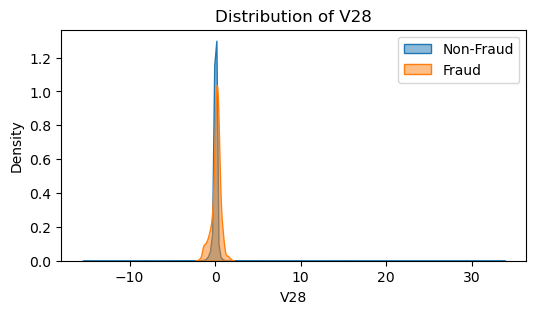

In [ ]:
fraud = df[df['Class'] == 1]
nonfraud = df[df['Class'] == 0]

# Density plots of V-features
for col in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(nonfraud[col], label='Non-Fraud', fill=True, alpha=0.5)
    sns.kdeplot(fraud[col], label='Fraud', fill=True, alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

v15 22 25 28 looks visually similar in kde


Signed correlation for top correlated features:
Class    1.000000
V17     -0.326481
V14     -0.302544
V12     -0.260593
V10     -0.216883
V16     -0.196539
V3      -0.192961
V7      -0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

Top features most correlated with fraud (by magnitude):
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


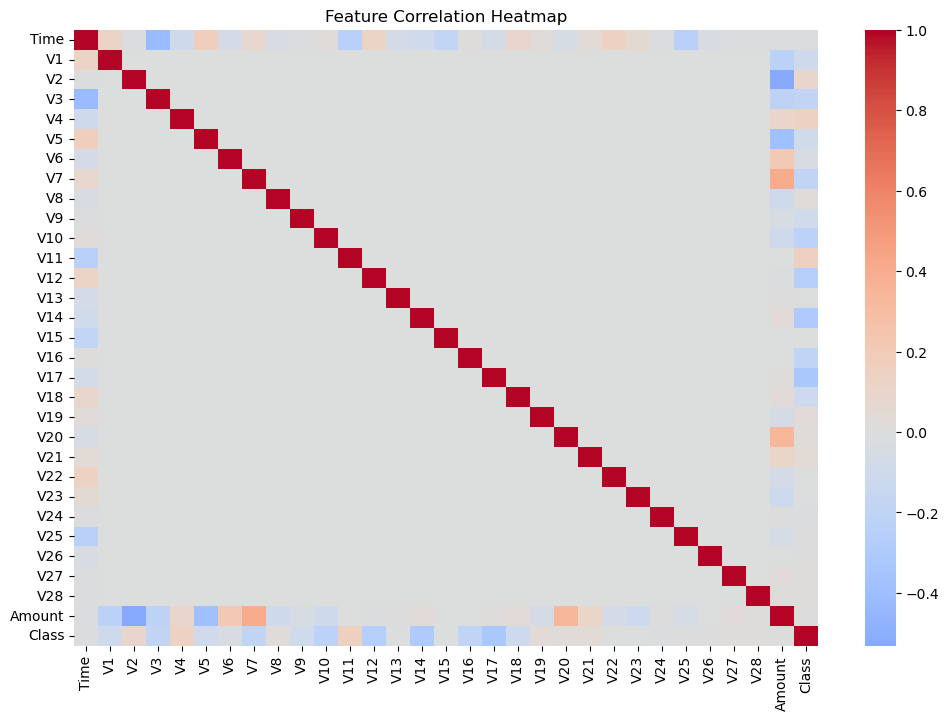

In [ ]:
# absolute correlation with Class
corr_abs = df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)

# top 10 feature names
top_features = corr_abs.head(10).index

#actual signed correlations for interpretation
print("\nSigned correlation for top correlated features:")
print(df.corr(numeric_only=True)['Class'][top_features])

#top absolute correlations
print("\nTop features most correlated with fraud (by magnitude):")
print(corr_abs.head(10))


# Full heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

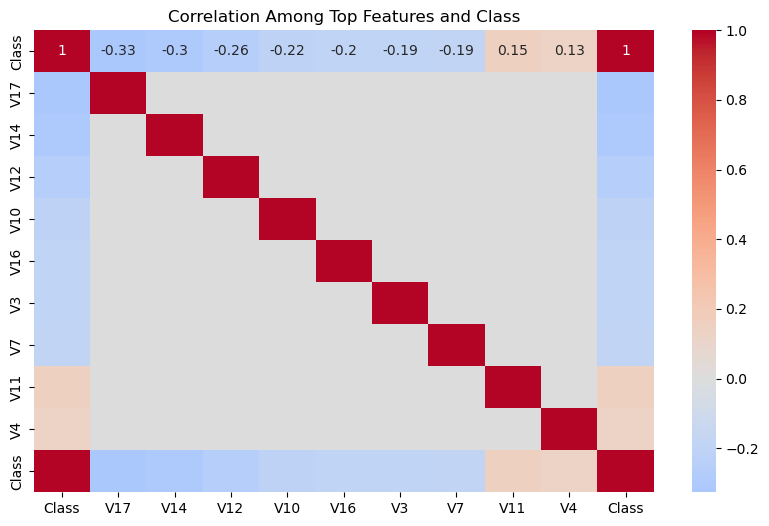

In [33]:
top_corr_features = list(top_features) + ['Class']
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Among Top Features and Class")
plt.show()

notice that 15 has low correlation in abs terms

<div class="alert alert-block alert-info">
model testing

In [4]:
X = df.drop(columns=['Class'])
y = df['Class']

#Split into (train+valid) and test
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X, y))

X_train_valid = X.iloc[train_valid_idx]
y_train_valid = y.iloc[train_valid_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print("Train+Valid shape:", X_train_valid.shape)
print("Test shape:", X_test.shape)

Train+Valid shape: (227845, 30)
Test shape: (56962, 30)


In [5]:
# Split train+valid into train and validation
# 20% of 80% = 16% total
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid.iloc[train_idx]
y_train = y_train_valid.iloc[train_idx]
X_valid = X_train_valid.iloc[valid_idx]
y_valid = y_train_valid.iloc[valid_idx]

print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (182276, 30)
Valid shape: (45569, 30)


<div class="alert alert-block alert-info">
random forest variants

In [6]:
# 3. Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#standardise using standardscaler since we are interested in fraud
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns= X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns= X_valid.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_det(model, X_test, y_test, X_valid, y_valid):
    # Predictions
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_proba_valid = model.predict_proba(X_valid)[:, 1]

    y_pred_valid = (y_proba_valid >= 0.5).astype(int)

    # Basic Metrics test
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Basic Metrics valid
    f1_valid = f1_score(y_valid, y_pred_valid)

    # AUCs
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_test = auc(fpr_test, tpr_test)

    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)

    auc_diff = auc_valid - auc_test

    # Display metrics
    metrics = {
        'Accuracy (Test)': round(accuracy, 6),
        'Precision (Test)': round(precision, 6),
        'Recall (Test)': round(recall, 6),
        'F1 Score (Test)': round(f1_test, 6),
        'F1 Score (Valid)': round(f1_valid, 6),
        'AUC (Valid)': round(auc_valid, 6),
        'AUC (Test)': round(auc_test, 6),
        'AUC Gap (Valid - Test)': round(auc_diff, 6)
    }

    print("Evaluation at Default Threshold (0.5):")
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})", color='darkorange', lw=2)
    plt.plot(fpr_valid, tpr_valid, label=f"Valid ROC (AUC = {auc_valid:.3f})", color='blue', linestyle='--')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: Validation vs Test')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    return metrics

def plot_normalized_conf_matrix(y_true, y_pred):
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        normalize='true',  # row-wise (i.e., per actual class)
        cmap='Blues',
        values_format=".2f"
    )
    plt.title("Normalized Confusion Matrix")
    plt.grid(False)
    plt.show()

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap_score = average_precision_score(y_true, y_scores)

    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='purple', lw=2, label=f"AP = {ap_score:.3f}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Average precision Curve')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()
    
    print(f"Average Precision (AP): {ap_score:.6f}")

def plot_precision_recall_vs_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
    plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
    plt.xlabel('Decision Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs Threshold')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

def find_best_f1_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # avoid division by zero
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]
    return best_threshold, best_f1



def plot_f1_vs_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8) 

    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, f1_scores[:-1], color='green', label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

def evaluate_model_proba_analysis(model, X_valid, y_valid, X_test, y_test):
    # Evaluate fixed threshold (0.5) metrics and ROC curve with validation comparison
    metrics = evaluate_model_det(model, X_test, y_test, X_valid, y_valid)

    # Predict probabilities on test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Predict class labels at default 0.5 threshold for confusion matrix
    y_pred = (y_proba >= 0.5).astype(int)

    # Plot probability-based curves
    plot_precision_recall_curve(y_test, y_proba)
    plot_precision_recall_vs_threshold(y_test, y_proba)
    plot_f1_vs_threshold(y_test, y_proba)

    # Plot normalized confusion matrix
    plot_normalized_conf_matrix(y_test, y_pred)

    return metrics

# --- Final evaluation with optimized threshold ---
def evaluate_with_best_threshold(model, X_test, y_test, X_valid, y_valid):
    # Predict probabilities
    y_proba_valid = model.predict_proba(X_valid)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Find best threshold on validation set
    best_thresh, best_f1 = find_best_f1_threshold(y_valid, y_proba_valid)

    print(f"\nBest threshold by max F1 (on validation): {best_thresh:.4f}")
    print(f"Best F1 Score (validation): {best_f1:.4f}\n")

    # Apply threshold
    y_pred_valid = (y_proba_valid >= best_thresh).astype(int)
    y_pred_test = (y_proba_test >= best_thresh).astype(int)

    # Evaluate on validation set
    acc_valid = accuracy_score(y_valid, y_pred_valid)
    prec_valid = precision_score(y_valid, y_pred_valid)
    rec_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)

    # Evaluate on test set
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Calculate AUCs and AUC gap at best threshold
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_proba_valid)
    auc_valid = auc(fpr_valid, tpr_valid)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_test = auc(fpr_test, tpr_test)

    auc_gap = auc_valid - auc_test

    # Also evaluate metrics at default threshold (0.5)
    default_metrics = evaluate_model_det(model, X_test, y_test, X_valid, y_valid)

    print("\nEvaluation at Best Threshold:")
    print("-------- Validation Set --------")
    print(f"Accuracy:  {acc_valid:.6f}")
    print(f"Precision: {prec_valid:.6f}")
    print(f"Recall:    {rec_valid:.6f}")
    print(f"F1 Score:  {f1_valid:.6f}")
    print(f"AUC:       {auc_valid:.6f}")

    print("---------- Test Set ----------")
    print(f"Accuracy:  {acc_test:.6f}")
    print(f"Precision: {prec_test:.6f}")
    print(f"Recall:    {rec_test:.6f}")
    print(f"F1 Score:  {f1_test:.6f}")
    print(f"AUC:       {auc_test:.6f}")

    print(f"\nAUC Gap (Valid - Test): {auc_gap:.6f}")

    # Plot performance on test set
    plot_normalized_conf_matrix(y_test, y_pred_test)
    plot_precision_recall_curve(y_test, y_proba_test)
    plot_precision_recall_vs_threshold(y_test, y_proba_test)
    plot_f1_vs_threshold(y_test, y_proba_test)

    return {
        "best_threshold": best_thresh,
        "best_f1": round(best_f1, 6),
        "auc_gap": round(auc_gap, 6),
        "default_metrics": default_metrics,
        "threshold_eval": {
            "Validation": {
                "Accuracy": round(acc_valid, 6),
                "Precision": round(prec_valid, 6),
                "Recall": round(rec_valid, 6),
                "F1 Score": round(f1_valid, 6),
                "AUC": round(auc_valid, 6),
            },
            "Test": {
                "Accuracy": round(acc_test, 6),
                "Precision": round(prec_test, 6),
                "Recall": round(rec_test, 6),
                "F1 Score": round(f1_test, 6),
                "AUC": round(auc_test, 6),
            },
            "AUC Gap (Valid - Test)": round(auc_gap, 6),
        }
    }

In [10]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)  
X_test_pca = pca.transform(X_test_scaled)
pca.n_components_

26

=== Random Forest WITHOUT PCA ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999456
Precision (Test): 0.831683
Recall (Test): 0.857143
F1 Score (Test): 0.844221
F1 Score (Valid): 0.815789
AUC (Valid): 0.961196
AUC (Test): 0.96938
AUC Gap (Valid - Test): -0.008184


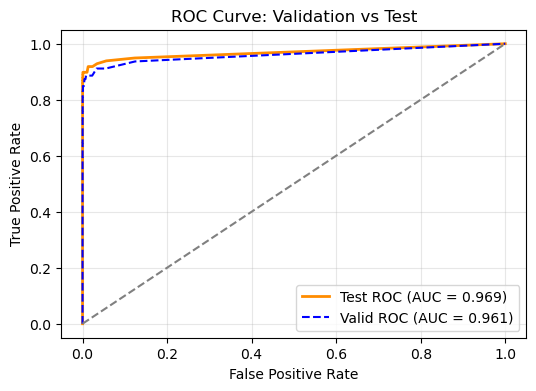

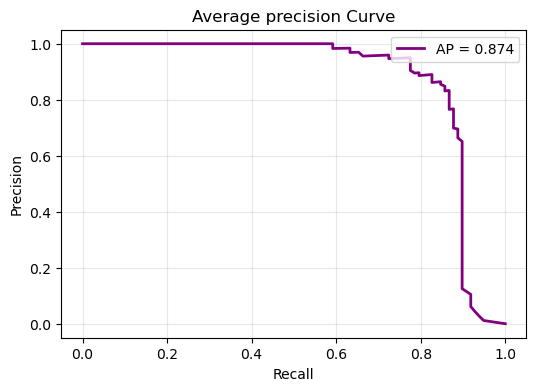

Average Precision (AP): 0.873639


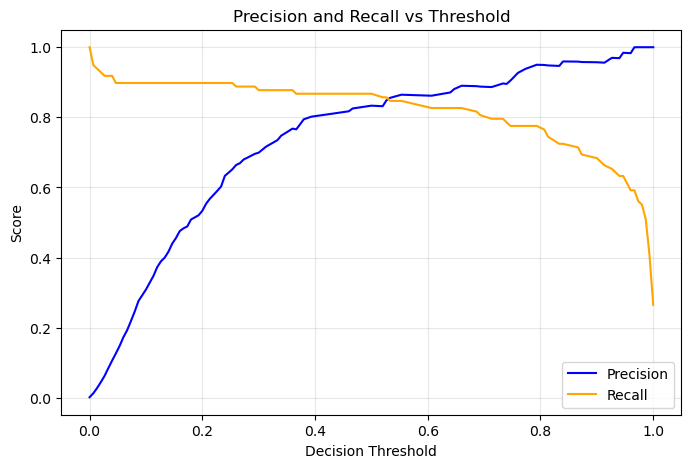

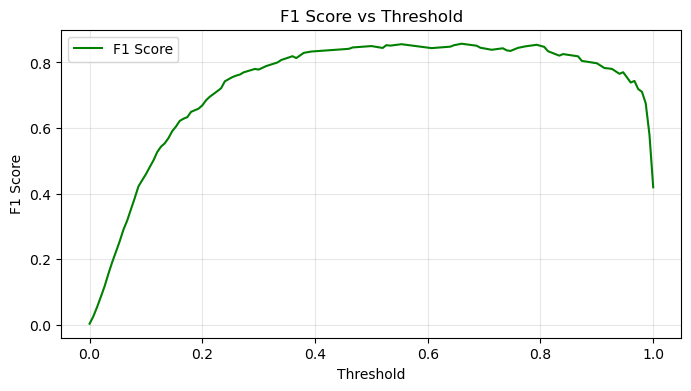

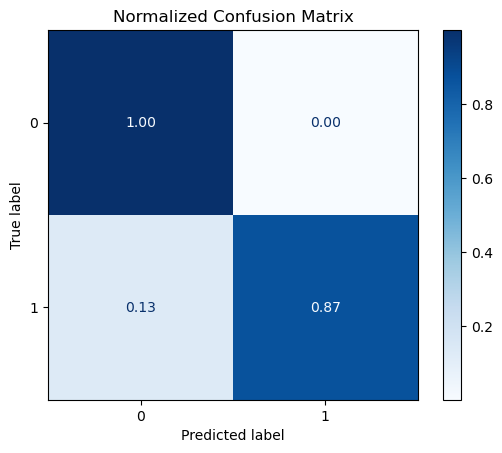

{'Accuracy (Test)': 0.999456,
 'Precision (Test)': 0.831683,
 'Recall (Test)': 0.857143,
 'F1 Score (Test)': 0.844221,
 'F1 Score (Valid)': 0.815789,
 'AUC (Valid)': 0.961196,
 'AUC (Test)': 0.96938,
 'AUC Gap (Valid - Test)': -0.008184}

In [19]:
#pre pca
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_scaled, y_train_resampled)
clf.score(X_valid_scaled, y_valid)

y_pred = clf.predict(X_valid_scaled)
print("=== Random Forest WITHOUT PCA ===")
evaluate_model_proba_analysis(clf, X_valid_scaled, y_valid, X_test_scaled, y_test)



=== Random Forest WITH PCA ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999473
Precision (Test): 0.846939
Recall (Test): 0.846939
F1 Score (Test): 0.846939
F1 Score (Valid): 0.815789
AUC (Valid): 0.960626
AUC (Test): 0.968693
AUC Gap (Valid - Test): -0.008067


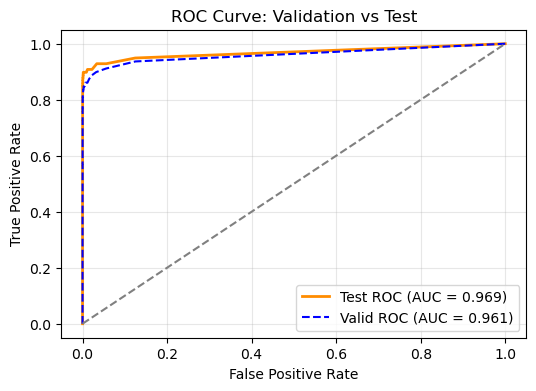

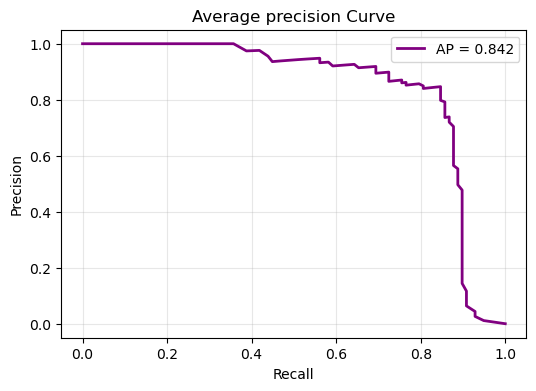

Average Precision (AP): 0.842421


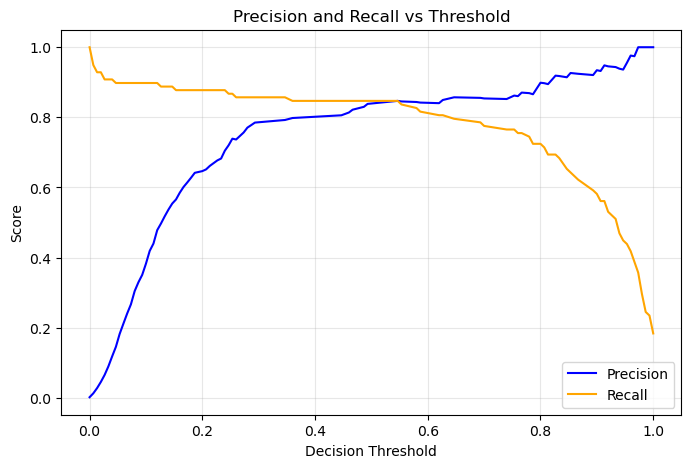

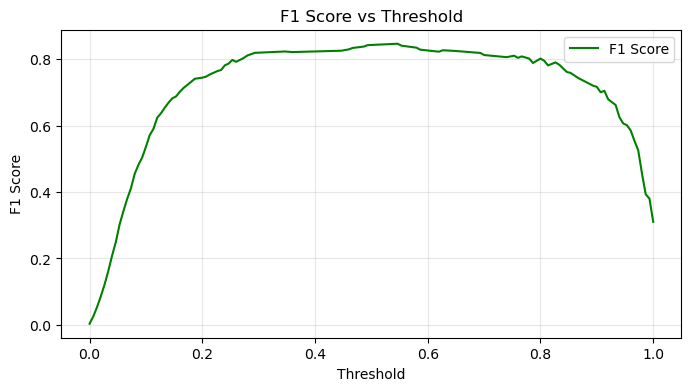

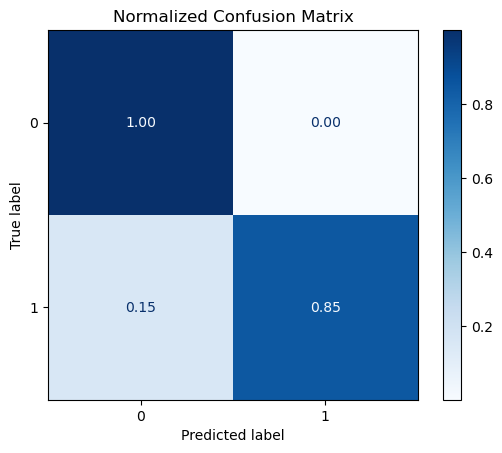

{'Accuracy (Test)': 0.999473,
 'Precision (Test)': 0.846939,
 'Recall (Test)': 0.846939,
 'F1 Score (Test)': 0.846939,
 'F1 Score (Valid)': 0.815789,
 'AUC (Valid)': 0.960626,
 'AUC (Test)': 0.968693,
 'AUC Gap (Valid - Test)': -0.008067}

In [21]:
#randomforest after pca
clf_pca = RandomForestClassifier(n_estimators=150, random_state=42)
clf_pca.fit(X_train_pca, y_train_resampled)

print("\n=== Random Forest WITH PCA ===")
evaluate_model_proba_analysis(clf_pca, X_valid_pca, y_valid, X_test_pca, y_test)

<div class="alert alert-block alert-info">
random forest finetuning exploration

In [11]:

rf = RandomForestClassifier(random_state=42, class_weight='balanced') 

param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',  
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [12]:
# Without PCA
rf_search.fit(X_train_scaled, y_train_resampled)
best_rf_no_pca = rf_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  57.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  58.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  59.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 1.0min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.2min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.3min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_

In [13]:
print("Best params (No PCA):", rf_search.best_params_)  # after fitting on X_train_scaled
print("Best score (No PCA):", rf_search.best_score_)

Best params (No PCA): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Best score (No PCA): 0.9958428388607935


Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999456
Precision (Test): 0.831683
Recall (Test): 0.857143
F1 Score (Test): 0.844221
F1 Score (Valid): 0.815789
AUC (Valid): 0.949376
AUC (Test): 0.964583
AUC Gap (Valid - Test): -0.015207


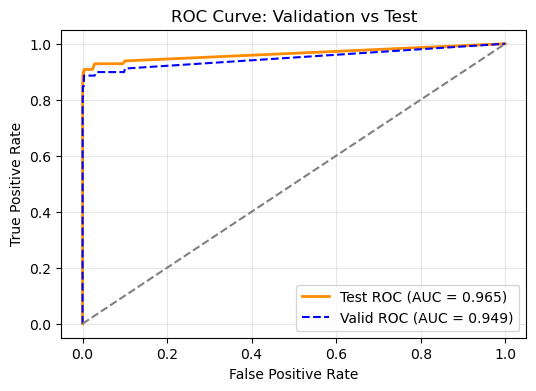

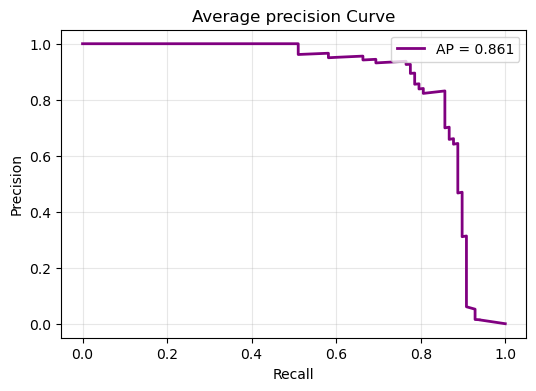

Average Precision (AP): 0.860623


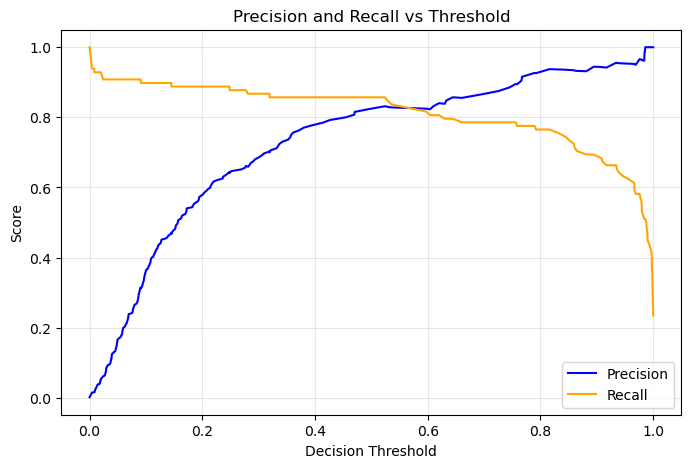

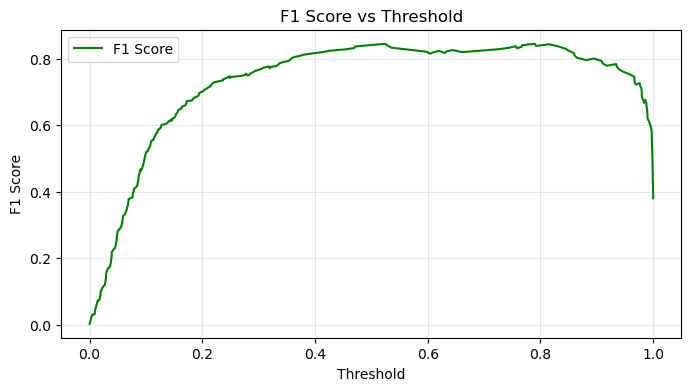

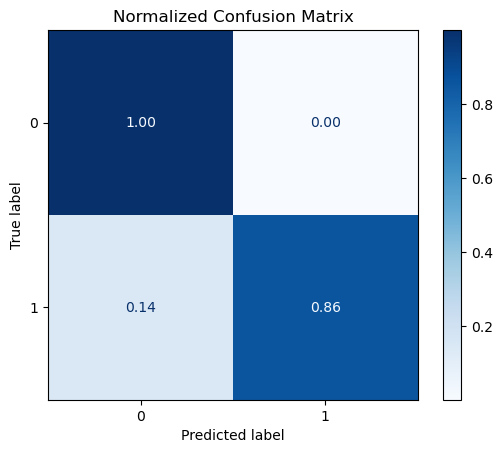

{'Accuracy (Test)': 0.999456,
 'Precision (Test)': 0.831683,
 'Recall (Test)': 0.857143,
 'F1 Score (Test)': 0.844221,
 'F1 Score (Valid)': 0.815789,
 'AUC (Valid)': 0.949376,
 'AUC (Test)': 0.964583,
 'AUC Gap (Valid - Test)': -0.015207}

In [14]:
evaluate_model_proba_analysis(best_rf_no_pca, X_valid_scaled, y_valid, X_test_scaled, y_test)


Best threshold by max F1 (on validation): 0.7899
Best F1 Score (validation): 0.8444

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999386
Precision (Test): 0.849315
Recall (Test): 0.78481
F1 Score (Test): 0.815789
F1 Score (Valid): 0.844221
AUC (Valid): 0.964583
AUC (Test): 0.949376
AUC Gap (Valid - Test): 0.015207


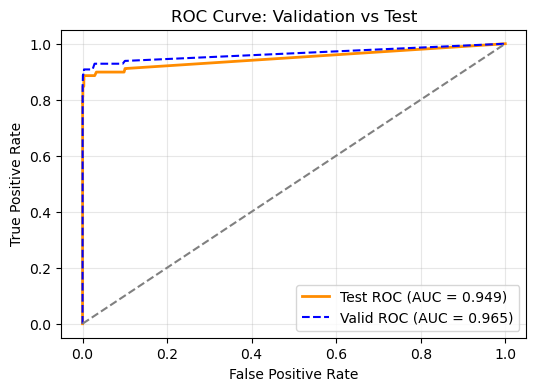


Evaluation at Best Threshold:
-------- Validation Set --------
Accuracy:  0.999508
Precision: 0.926829
Recall:    0.775510
F1 Score:  0.844444
AUC:       0.964583
---------- Test Set ----------
Accuracy:  0.999320
Precision: 0.875000
Recall:    0.708861
F1 Score:  0.783217
AUC:       0.949376

AUC Gap (Valid - Test): 0.015207


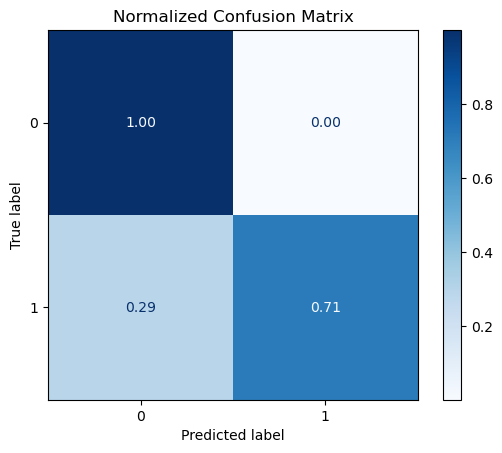

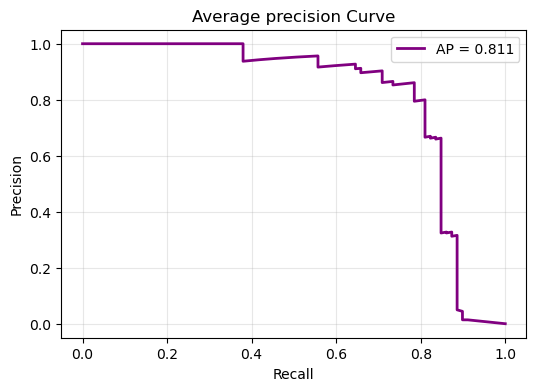

Average Precision (AP): 0.810969


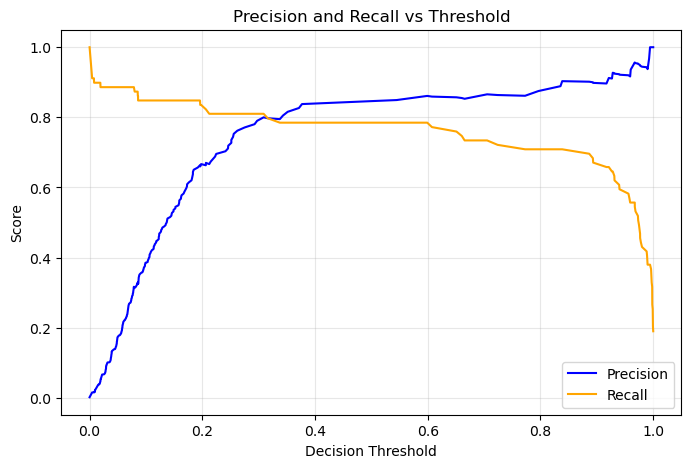

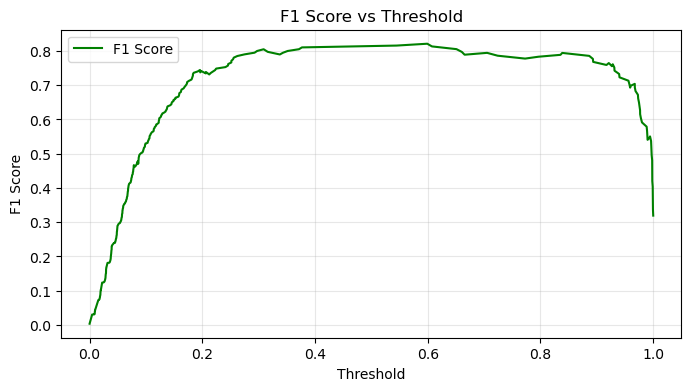

{'best_threshold': 0.7898510510958707,
 'best_f1': 0.844444,
 'auc_gap': 0.015207,
 'default_metrics': {'Accuracy (Test)': 0.999386,
  'Precision (Test)': 0.849315,
  'Recall (Test)': 0.78481,
  'F1 Score (Test)': 0.815789,
  'F1 Score (Valid)': 0.844221,
  'AUC (Valid)': 0.964583,
  'AUC (Test)': 0.949376,
  'AUC Gap (Valid - Test)': 0.015207},
 'threshold_eval': {'Validation': {'Accuracy': 0.999508,
   'Precision': 0.926829,
   'Recall': 0.77551,
   'F1 Score': 0.844444,
   'AUC': 0.964583},
  'Test': {'Accuracy': 0.99932,
   'Precision': 0.875,
   'Recall': 0.708861,
   'F1 Score': 0.783217,
   'AUC': 0.949376},
  'AUC Gap (Valid - Test)': 0.015207}}

In [16]:
evaluate_with_best_threshold(best_rf_no_pca, X_valid_scaled, y_valid, X_test_scaled, y_test)

recall and f1 test worsened but precision increased after finetuning threshold, but this is not desired for fraud

<div class="alert alert-block alert-info">
random forest with pca

In [15]:

rf = RandomForestClassifier(random_state=42, class_weight='balanced') 

param_dist = {
    'max_depth': randint(30, 50),  
    'max_features': ['sqrt', 'log2'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': randint(4, 7),  
    'n_estimators': randint(180, 260)  
}

rf_pca_search = RandomizedSearchCV(
    rf, 
    param_dist, 
    scoring='f1', 
    cv=3, 
    n_iter=15, 
    random_state=42,
    verbose=2,    
    n_jobs=-1     
)
rf_pca_search.fit(X_train_pca, y_train_resampled)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=181; total time= 2.0min
[CV] END max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=181; total time= 2.1min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=201; total time= 2.2min
[CV] END max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=181; total time= 2.2min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=201; total time= 2.3min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=201; total time= 2.4min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=228; total time= 2.6min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=228

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f50acc8e910>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f50acceb390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f50acc94fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f50acd00050>},
                   random_state=42, scoring='f1', verbose=2)

In [17]:
# With PCA
best_rf_pca = rf_pca_search.best_estimator_

In [18]:
print("Best params (With PCA):", rf_pca_search.best_params_)
print("Best score (With PCA):", rf_pca_search.best_score_)

Best params (With PCA): {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 201}
Best score (With PCA): 0.9957590839313891


=== Best Random Forest (Post-PCA) ===
Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.99928
Precision (Test): 0.8
Recall (Test): 0.77551
F1 Score (Test): 0.787565
F1 Score (Valid): 0.780822
AUC (Valid): 0.966147
AUC (Test): 0.973022
AUC Gap (Valid - Test): -0.006875


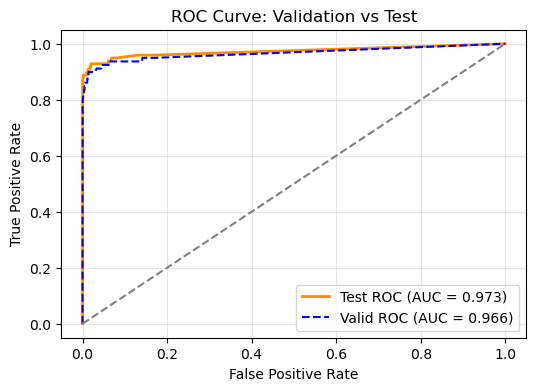

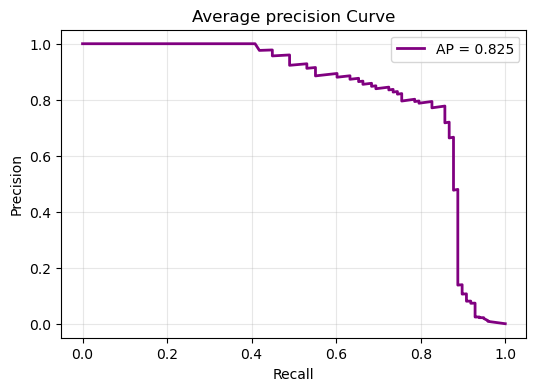

Average Precision (AP): 0.824786


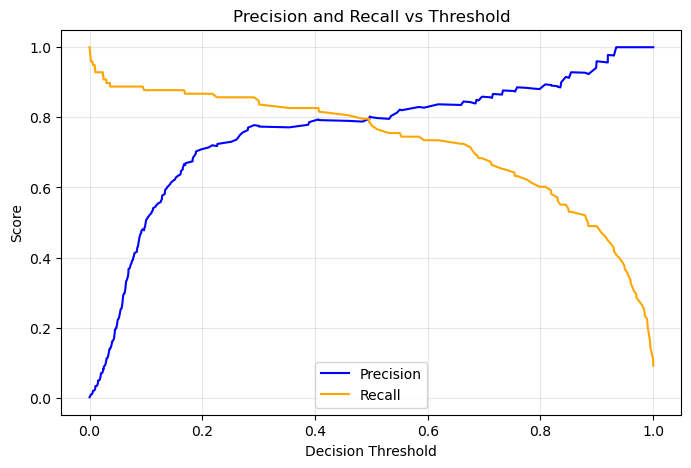

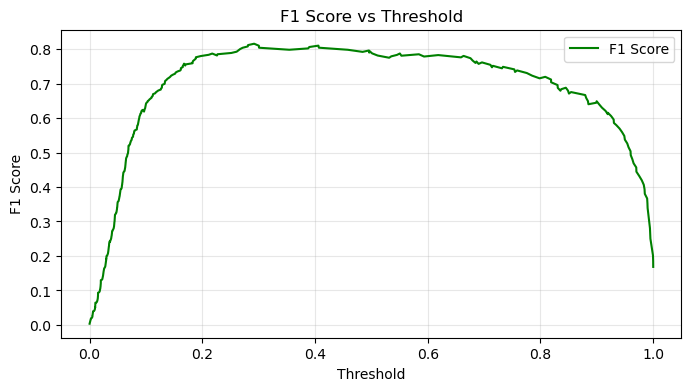

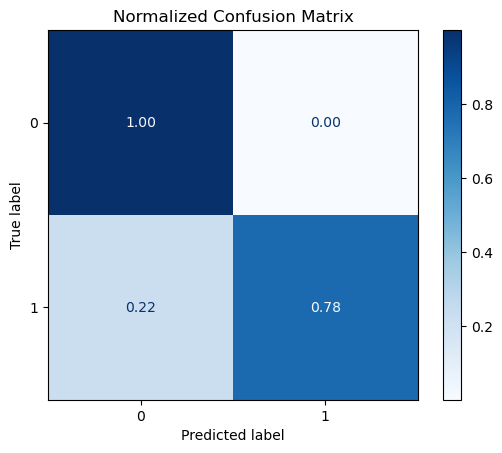

{'Accuracy (Test)': 0.99928,
 'Precision (Test)': 0.8,
 'Recall (Test)': 0.77551,
 'F1 Score (Test)': 0.787565,
 'F1 Score (Valid)': 0.780822,
 'AUC (Valid)': 0.966147,
 'AUC (Test)': 0.973022,
 'AUC Gap (Valid - Test)': -0.006875}

In [19]:
print("=== Best Random Forest (Post-PCA) ===")
evaluate_model_proba_analysis(best_rf_pca, X_valid_pca, y_valid, X_test_pca, y_test)


pca reduced auc gap but had lower f1 scores and recall

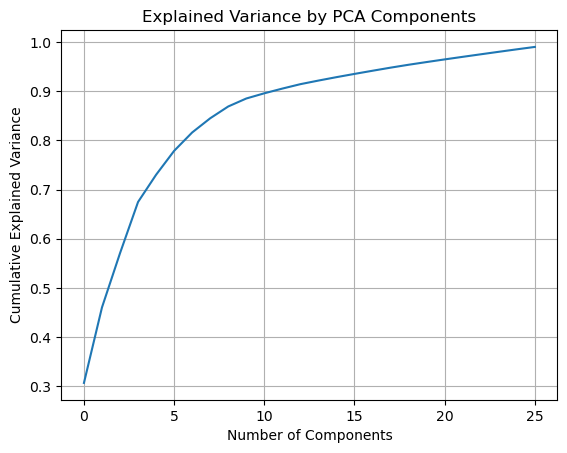

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

pca decreased f1 recall precision here

<div class="alert alert-block alert-info">
isolation forest route

In [24]:
from sklearn.ensemble import IsolationForest


# Fit Isolation Forest on training data
iso = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso.fit_predict(X_train_scaled)

# Convert to binary outlier feature (1 = outlier, 0 = normal)
outlier_feature = (outlier_labels == -1).astype(int)

# Predict outlier labels on validation and test sets
outlier_feature_valid = (iso.predict(X_valid_scaled) == -1).astype(int)
outlier_feature_test = (iso.predict(X_test_scaled) == -1).astype(int)

# Add the outlier feature as a new column to each dataset
X_train_with_outlier = pd.concat([
    X_train_scaled.reset_index(drop=True),
    pd.Series(outlier_feature, name='outlier')
], axis=1)

X_valid_with_outlier = pd.concat([
    X_valid_scaled.reset_index(drop=True),
    pd.Series(outlier_feature_valid, name='outlier')
], axis=1)

X_test_with_outlier = pd.concat([
    X_test_scaled.reset_index(drop=True),
    pd.Series(outlier_feature_test, name='outlier')
], axis=1)


In [26]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20, 
    scoring='f1',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train_with_outlier, y_train_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.4min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.4min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 1.4min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=157; total time= 1.5min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.9min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.9min
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=206; total time= 1.9min
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [30, 40, 50, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f501314f090>},
                   random_state=42, scoring='f1', verbose=2)

In [27]:
print("Best Parameters:", rf_search.best_params_)
print("Best CV F1 Score:", rf_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 221}
Best CV F1 Score: 0.9956210027129568



Best threshold by max F1 (on validation): 0.5655
Best F1 Score (validation): 0.8212

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999386
Precision (Test): 0.818182
Recall (Test): 0.826531
F1 Score (Test): 0.822335
F1 Score (Valid): 0.821192
AUC (Valid): 0.964844
AUC (Test): 0.982014
AUC Gap (Valid - Test): -0.01717


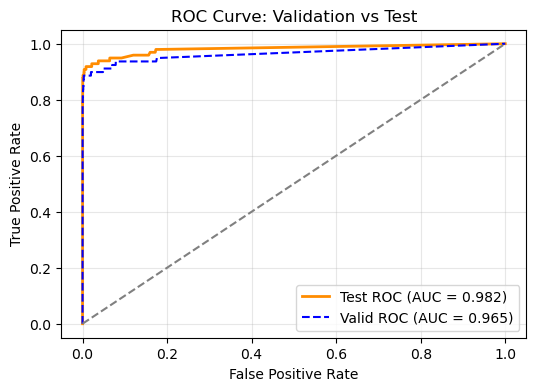


Evaluation at Best Threshold:
-------- Validation Set --------
Accuracy:  0.999407
Precision: 0.861111
Recall:    0.784810
F1 Score:  0.821192
AUC:       0.964844
---------- Test Set ----------
Accuracy:  0.999386
Precision: 0.838710
Recall:    0.795918
F1 Score:  0.816754
AUC:       0.982014

AUC Gap (Valid - Test): -0.017170


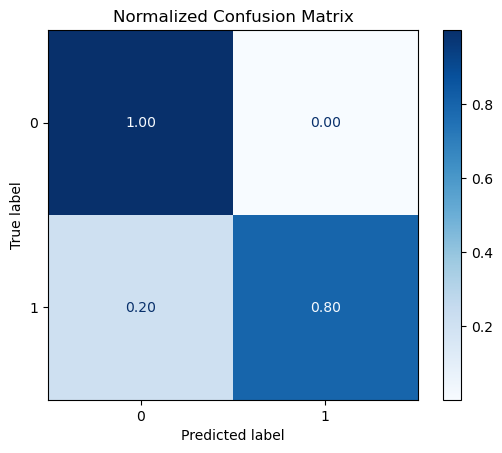

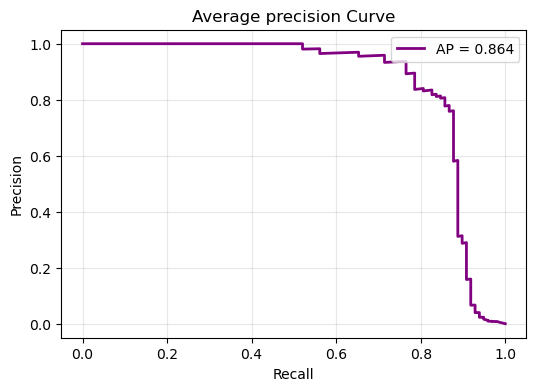

Average Precision (AP): 0.864306


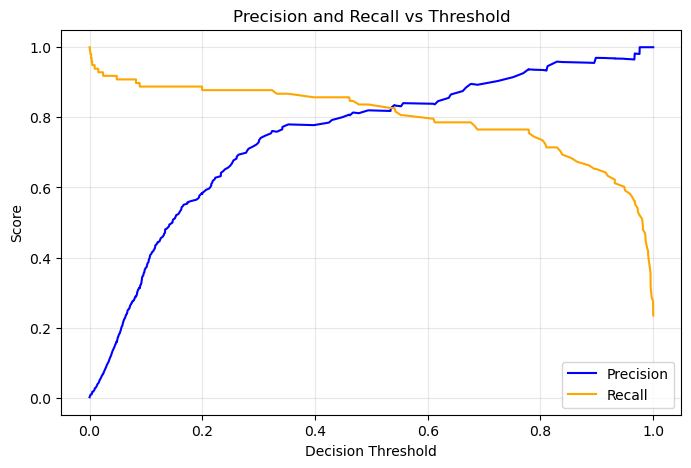

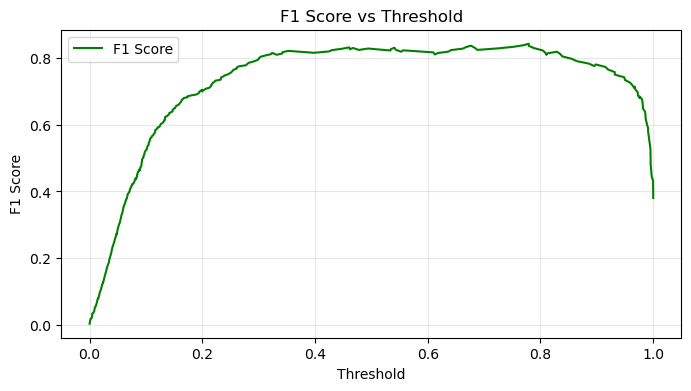

In [28]:
results = evaluate_with_best_threshold(
    model=rf_search.best_estimator_, 
    X_test=X_test_with_outlier, 
    y_test=y_test, 
    X_valid=X_valid_with_outlier, 
    y_valid=y_valid
)

In [21]:
best_rf_model = rf_search.best_estimator_

# PCA
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Isolation Forest outlier flag
valid_outlier = iso.predict(X_valid_pca)
test_outlier = iso.predict(X_test_pca)

# Convert to binary flags
valid_outlier_flag = (valid_outlier == -1).astype(int)
test_outlier_flag = (test_outlier == -1).astype(int)

# Stack with PCA data
X_valid_with_outlier = np.hstack([X_valid_pca, valid_outlier_flag.reshape(-1, 1)])
X_test_with_outlier = np.hstack([X_test_pca, test_outlier_flag.reshape(-1, 1)])

Evaluation at Default Threshold (0.5):
Accuracy (Test): 0.999386
Precision (Test): 0.870588
Recall (Test): 0.755102
F1 Score (Test): 0.808743
F1 Score (Valid): 0.783217
AUC (Valid): 0.944925
AUC (Test): 0.966478
AUC Gap (Valid - Test): -0.021553


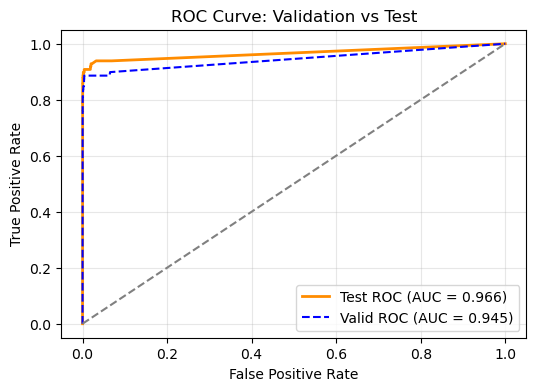

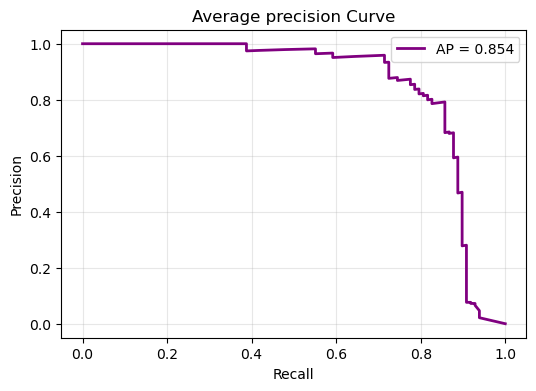

Average Precision (AP): 0.854388


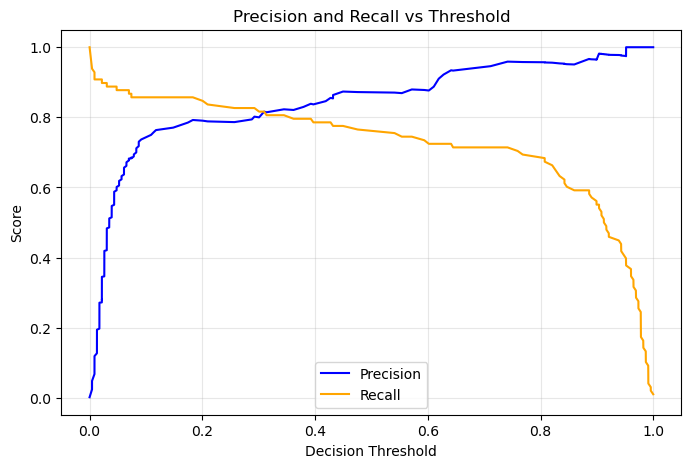

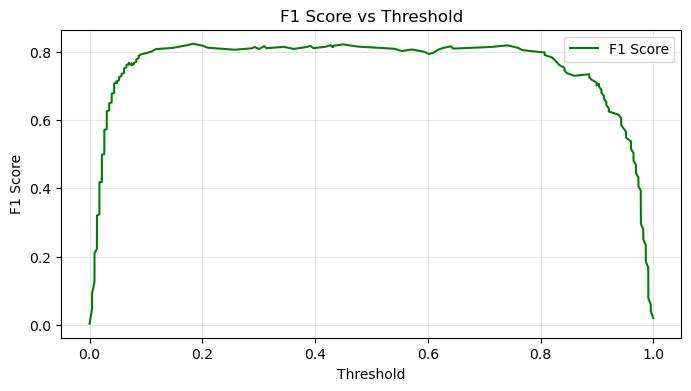

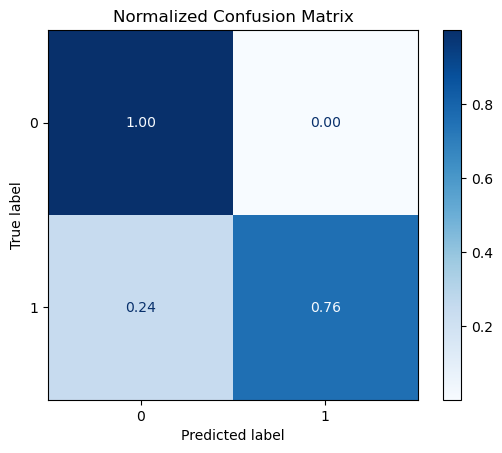

In [22]:
metrics = evaluate_model_proba_analysis(
    best_rf_model, 
    X_valid_with_outlier, y_valid, 
    X_test_with_outlier, y_test
)

isolation forest feature seems to have little impact here. random forest without pca or isolation forest is better

<div class="alert alert-block alert-info">
observations between without smote resample vs smote resample 

smote resample approach:

pca results in worse f1 and recall if smote resample is used, this can be related to how smote affects the variance of the dataset

pca does not work well with smote here

randomtforest with smote without pca underperforms without smote randomforest after pca (f1 0.86)

recall and f1 test worsened but precision increased after finetuning threshold, but this is not desired for fraud, unftortunately this affects final finetuning for smote approach

In conclusion, 
without smote randomforest after pca (f1 0.86) is the top performer here